# Import Library

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


# Input data

In [2]:
df = pd.read_csv("/kaggle/input/titanic/train.csv")
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


# EDA

In [3]:
df.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [4]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
df['Age'] = df['Age'].fillna(df['Age'].median())

In [6]:
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

In [7]:
df = df.drop('Cabin', axis=1)

In [8]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

# Show Data

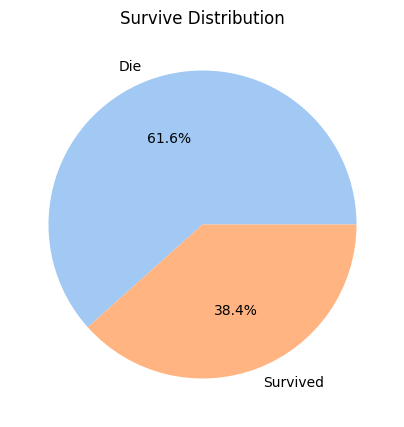

In [60]:
survive_counts = df['Survived'].value_counts()
labels = survive_counts.index.map({1: 'Survived', 0: 'Die'})

plt.figure(figsize=(5, 5))
plt.pie(survive_counts, labels=labels, autopct='%1.1f%%', colors=sns.color_palette('pastel'))

plt.title('Survive Distribution')
plt.show()

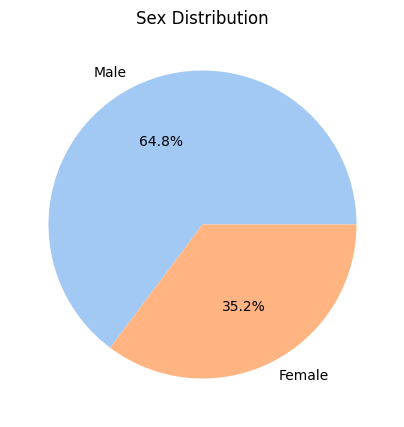

In [61]:
sex_counts = df['Sex'].value_counts()
labels = sex_counts.index.map({1: 'Male', 0: 'Female'})

plt.figure(figsize=(5, 5))
plt.pie(sex_counts, labels=labels, autopct='%1.1f%%', colors=sns.color_palette('pastel'))

plt.title('Sex Distribution')
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


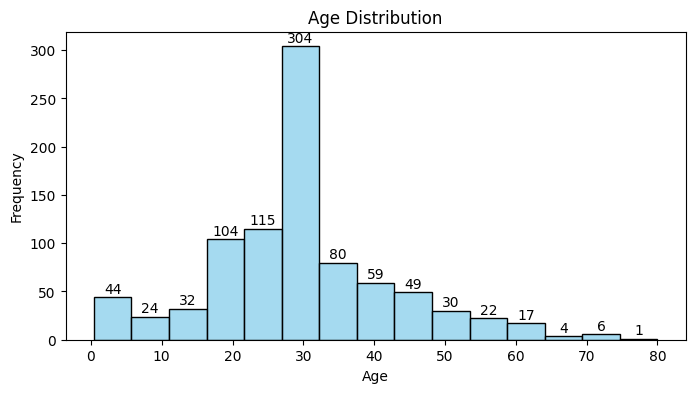

In [63]:
plt.figure(figsize=(8, 4))
hist = sns.histplot(df['Age'], bins=15, kde=False, color='skyblue')

for p in hist.patches:
    height = p.get_height()
    plt.text(p.get_x() + p.get_width() / 2., height + 1, int(height), ha='center', va='bottom')

plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')

plt.show()

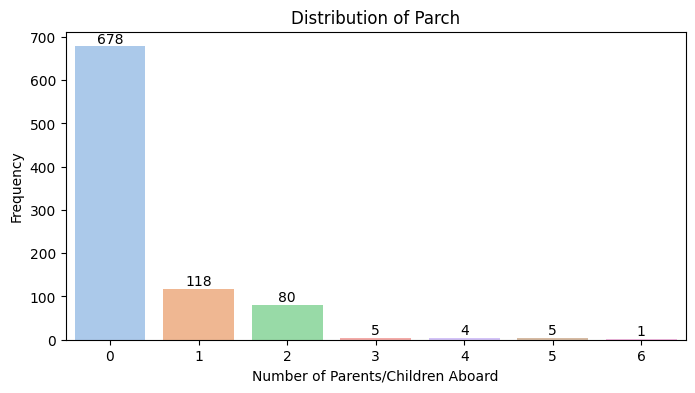

In [67]:
plt.figure(figsize=(8, 4))
count_plot = sns.countplot(x=df['Parch'], palette='pastel')

for p in count_plot.patches:
    height = p.get_height()
    count_plot.text(p.get_x() + p.get_width() / 2., height + 1, int(height), ha='center', va='bottom')

plt.title('Distribution of Parch')
plt.xlabel('Number of Parents/Children Aboard')
plt.ylabel('Frequency')

plt.show()

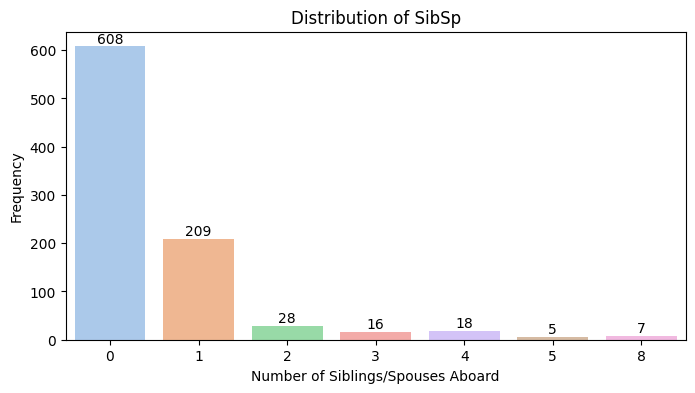

In [68]:
plt.figure(figsize=(8, 4))
count_plot = sns.countplot(x=df['SibSp'], palette='pastel')

for p in count_plot.patches:
    height = p.get_height()
    count_plot.text(p.get_x() + p.get_width() / 2., height + 1, int(height), ha='center', va='bottom')

plt.title('Distribution of SibSp')
plt.xlabel('Number of Siblings/Spouses Aboard')
plt.ylabel('Frequency')

plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


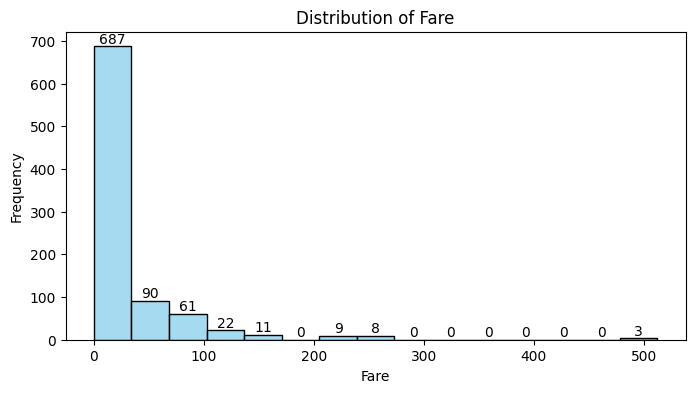

In [69]:
plt.figure(figsize=(8, 4))
fare_plot = sns.histplot(df['Fare'], bins=15, kde=False, color='skyblue')

for p in fare_plot.patches:
    height = p.get_height()
    fare_plot.text(p.get_x() + p.get_width() / 2., height + 1, int(height), ha='center', va='bottom')

plt.title('Distribution of Fare')
plt.xlabel('Fare')
plt.ylabel('Frequency')
plt.show()

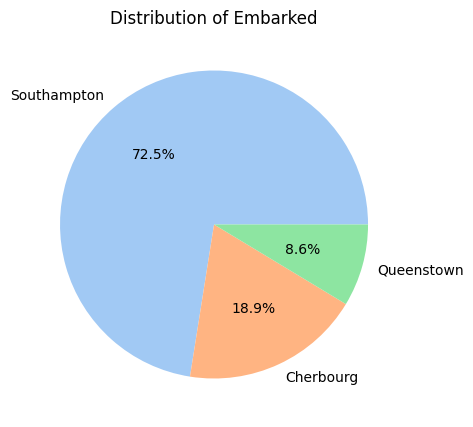

In [70]:
embarked_counts = df['Embarked'].value_counts()

labels = {0: 'Cherbourg', 1: 'Queenstown', 2: 'Southampton'}
embarked_labels = embarked_counts.index.map(labels)

plt.figure(figsize=(5, 5))
plt.pie(embarked_counts, labels=embarked_labels, autopct='%1.1f%%', colors=sns.color_palette('pastel'))
plt.title('Distribution of Embarked')
plt.show()

/tmp/ipykernel_33/1118487166.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_survival_mean = df.groupby('AgeGroup')['Survived'].mean().reset_index()


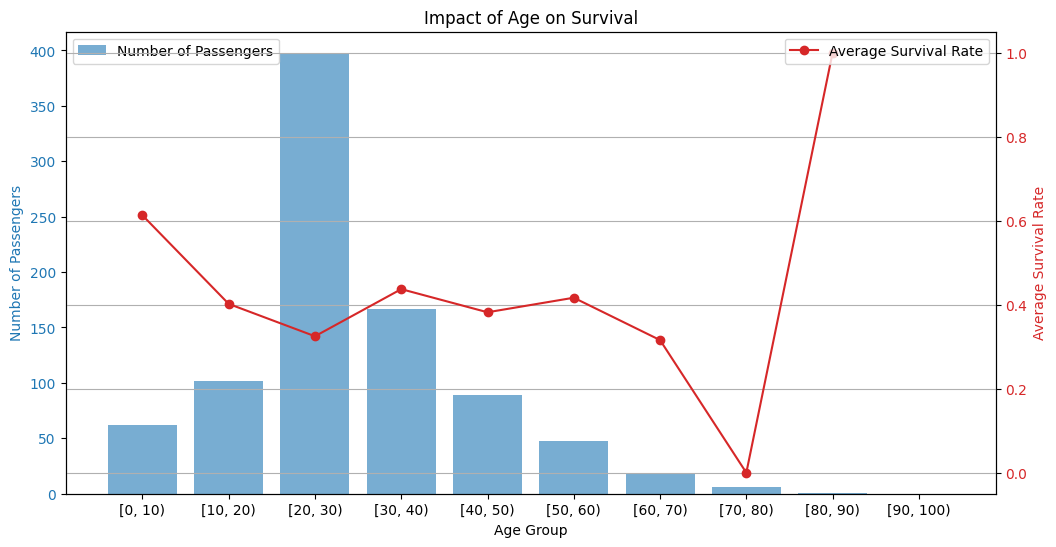

In [90]:
df['AgeGroup'] = pd.cut(df['Age'], bins=range(0, 101, 10), right=False)

age_survival_mean = df.groupby('AgeGroup')['Survived'].mean().reset_index()
age_counts = df['AgeGroup'].value_counts().sort_index()

fig, ax1 = plt.subplots(figsize=(12, 6))

color = 'tab:blue'
ax1.set_xlabel('Age Group')
ax1.set_ylabel('Number of Passengers', color=color)
ax1.bar(age_counts.index.astype(str), age_counts.values, color=color, alpha=0.6, label='Number of Passengers')
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('Average Survival Rate', color=color)
ax2.plot(age_survival_mean['AgeGroup'].astype(str), age_survival_mean['Survived'], color=color, marker='o', label='Average Survival Rate')
ax2.tick_params(axis='y', labelcolor=color)

plt.title('Impact of Age on Survival')
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.grid(True)
plt.show()

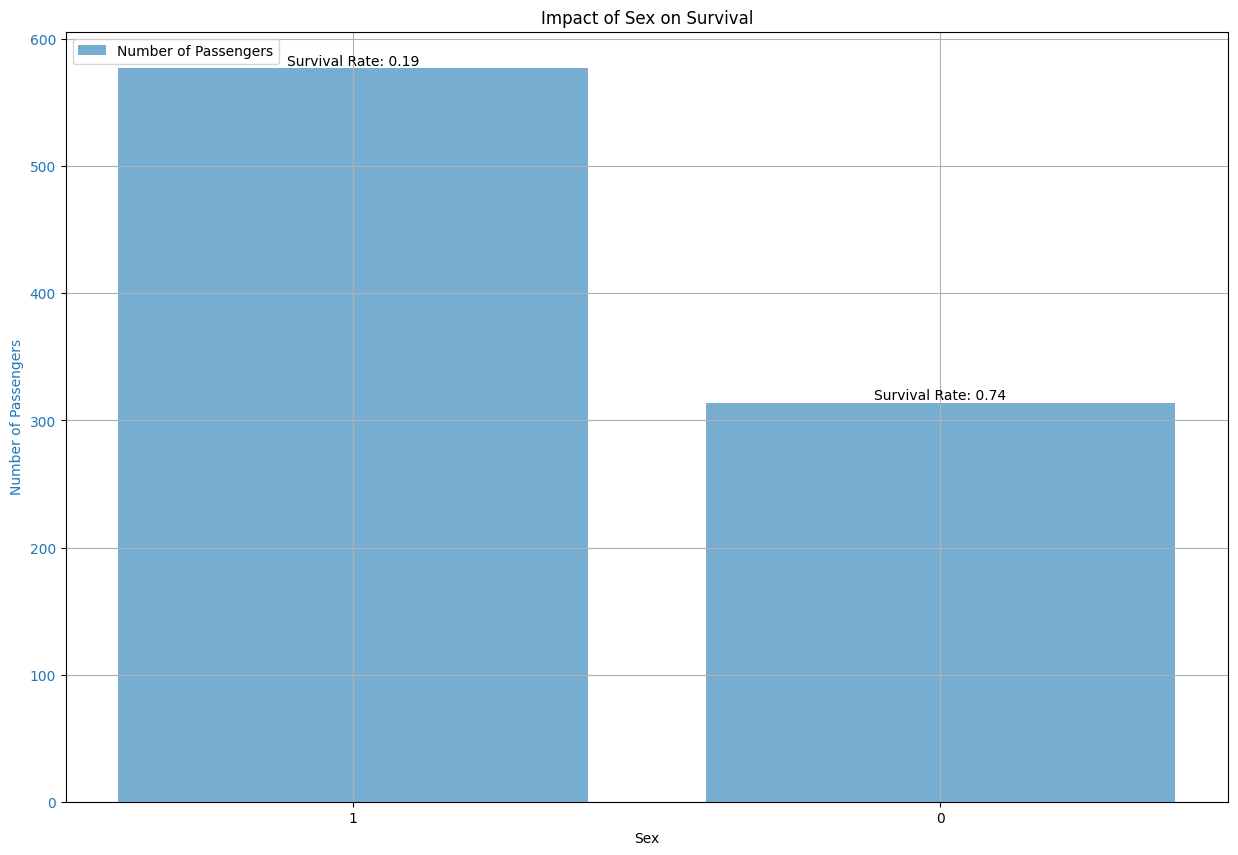

In [98]:
df['Sex'] = df['Sex'].astype(str)
sex_survival_mean = df.groupby('Sex')['Survived'].mean().reset_index()
sex_counts = df['Sex'].value_counts()

fig, ax1 = plt.subplots(figsize=(15, 10))

color = 'tab:blue'
ax1.set_xlabel('Sex')
ax1.set_ylabel('Number of Passengers', color=color)
ax1.bar(sex_counts.index, sex_counts.values, color=color, alpha=0.6, label='Number of Passengers')
ax1.tick_params(axis='y', labelcolor=color)

for i, (count, sex) in enumerate(zip(sex_counts.values, sex_counts.index)):
    survival_rate = sex_survival_mean[sex_survival_mean['Sex'] == sex]['Survived'].values[0]
    ax1.text(i, count, f'Survival Rate: {survival_rate:.2f}', ha='center', va='bottom', color='black')

plt.title('Impact of Sex on Survival')
ax1.legend(loc='upper left')

plt.grid(True)
plt.show()

# Feature Engineering

## Label Encoder untuk mengubah data kategorik menjadi numerik

In [16]:
from sklearn.preprocessing import LabelEncoder

In [17]:
le = LabelEncoder()
df['Sex'] = le.fit_transform(df['Sex'])
df['Embarked'] = le.fit_transform(df['Embarked'])

In [18]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,2
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,2


## Feature Selection

In [19]:
features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']
X = df[features]
y = df['Survived']

In [20]:
X

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,22.0,1,0,7.2500,2
1,1,0,38.0,1,0,71.2833,0
2,3,0,26.0,0,0,7.9250,2
3,1,0,35.0,1,0,53.1000,2
4,3,1,35.0,0,0,8.0500,2
...,...,...,...,...,...,...,...
886,2,1,27.0,0,0,13.0000,2
887,1,0,19.0,0,0,30.0000,2
888,3,0,28.0,1,2,23.4500,2
889,1,1,26.0,0,0,30.0000,0


In [21]:
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

## Train Test Split, Memisahkan data untuk dilatih dan diuji

In [22]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Data train

In [23]:
X_train

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
331,1,1,45.5,0,0,28.5000,2
733,2,1,23.0,0,0,13.0000,2
382,3,1,32.0,0,0,7.9250,2
704,3,1,26.0,1,0,7.8542,2
813,3,0,6.0,4,2,31.2750,2
...,...,...,...,...,...,...,...
106,3,0,21.0,0,0,7.6500,2
270,1,1,28.0,0,0,31.0000,2
860,3,1,41.0,2,0,14.1083,2
435,1,0,14.0,1,2,120.0000,2


In [24]:
y_train

331    0
733    0
382    0
704    0
813    0
      ..
106    1
270    0
860    0
435    1
102    0
Name: Survived, Length: 712, dtype: int64

### Data test

In [25]:
X_test

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
709,3,1,28.0,1,1,15.2458,0
439,2,1,31.0,0,0,10.5000,2
840,3,1,20.0,0,0,7.9250,2
720,2,0,6.0,0,1,33.0000,2
39,3,0,14.0,1,0,11.2417,0
...,...,...,...,...,...,...,...
433,3,1,17.0,0,0,7.1250,2
773,3,1,28.0,0,0,7.2250,0
25,3,0,38.0,1,5,31.3875,2
84,2,0,17.0,0,0,10.5000,2


In [26]:
y_test

709    1
439    0
840    0
720    1
39     1
      ..
433    0
773    0
25     1
84     1
10     1
Name: Survived, Length: 179, dtype: int64

# Modeling

## Membangun classification model menggunakan Random Forest

In [27]:
from sklearn.ensemble import RandomForestClassifier

model_rf = RandomForestClassifier(n_estimators=100, random_state=42)
model_rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

- n_estimators menentukan jumlah pohon (trees) yang akan dibuat dalam Random Forest. Ketika kita set n_estimators=100, ini berarti kita akan membuat 100 pohon keputusan (decision trees) yang berbeda. Setiap pohon akan membuat prediksi, dan hasil akhir adalah kombinasi dari semua prediksi pohon tersebut.
- random_state adalah angka yang digunakan untuk mengatur "benih" acak (random seed). Penggunaan random_state memastikan bahwa hasil yang kita dapatkan dari menjalankan model selalu konsisten. Misalnya, setiap kali kita menjalankan kode dengan random_state=42, hasilnya akan sama.

# Evaluation

In [28]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

## Prediksi data test menggunakan model random forest yang sudah dibangun

In [29]:
y_pred_rf = model_rf.predict(X_test)

## Buat confusion matrix

In [30]:
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
print("Confusion Matrix:")
print(conf_matrix_rf)

Confusion Matrix:
[[92 13]
 [19 55]]


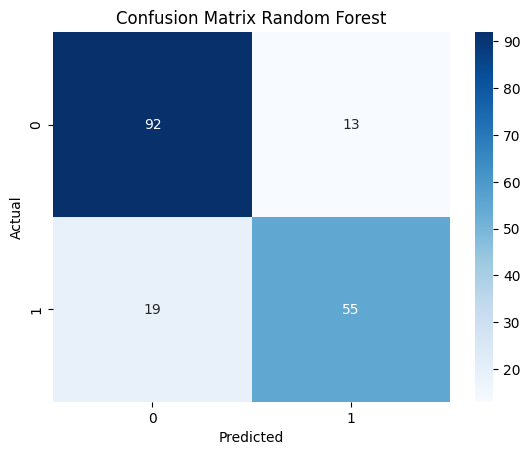

In [71]:
sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Random Forest')
plt.show()

## Hitung akurasi dari prediksi

In [32]:
accuracy = accuracy_score(y_test, y_pred_rf)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.82


## Classification Report Model RF

In [33]:
from sklearn.metrics import classification_report

y_pred_rf = model_rf.predict(X_test)

report_rf = classification_report(y_test, y_pred_rf)

print(report_rf)

              precision    recall  f1-score   support

           0       0.83      0.88      0.85       105
           1       0.81      0.74      0.77        74

    accuracy                           0.82       179
   macro avg       0.82      0.81      0.81       179
weighted avg       0.82      0.82      0.82       179



## Feature importances (Random Forest)

In [34]:
feature_importance = model_rf.feature_importances_

feature_names = X_train.columns

df_feature_importance = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importance
})

df_feature_importance = df_feature_importance.sort_values(by='Importance', ascending=False)
df_feature_importance

,Feature,Importance
1,Sex,0.271410
5,Fare,0.265010
2,Age,0.249995
0,Pclass,0.086957
3,SibSp,0.053685
4,Parch,0.039897
6,Embarked,0.033044


## Modelling dengan Logistic Regression

In [35]:
from sklearn.linear_model import LogisticRegression

model_lr = LogisticRegression(random_state=42)
model_lr.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [36]:
y_pred_lr = model_lr.predict(X_test)

In [37]:
conf_matrix_lr = confusion_matrix(y_test, y_pred_lr)
print("Confusion Matrix:")
print(conf_matrix_lr)

Confusion Matrix:
[[90 15]
 [19 55]]


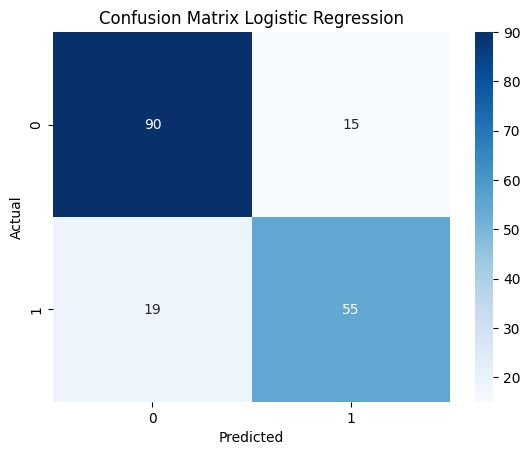

In [72]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.heatmap(conf_matrix_lr, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Logistic Regression')
plt.show()

In [39]:
accuracy = accuracy_score(y_test, y_pred_lr)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.81


## Classification Report Model LR

In [40]:
y_pred_lr = model_lr.predict(X_test)

report_lr = classification_report(y_test, y_pred_lr)

print(report_lr)

              precision    recall  f1-score   support

           0       0.83      0.86      0.84       105
           1       0.79      0.74      0.76        74

    accuracy                           0.81       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179



In [41]:
feature_importance_lr = np.abs(model_lr.coef_[0])
feature_names_lr = X_train.columns

importance_df_lr = pd.DataFrame({'Feature': feature_names_lr, 'Importance': feature_importance_lr})

importance_df_lr = importance_df_lr.sort_values(by='Importance', ascending=False)

print(importance_df_lr)

    Feature  Importance
1       Sex    2.596709
0    Pclass    0.930727
3     SibSp    0.293865
6  Embarked    0.218848
4     Parch    0.111821
2       Age    0.030430
5      Fare    0.002533


## Modelling dengan menggunakan SVM

In [42]:
from sklearn.svm import SVC
model_svm = SVC(kernel='linear', random_state=42)
model_svm.fit(X_train, y_train)

SVC(kernel='linear', random_state=42)

In [43]:
y_pred_svm = model_svm.predict(X_test)

In [44]:
conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)
print("Confusion Matrix:")
print(conf_matrix_svm)

Confusion Matrix:
[[88 17]
 [22 52]]


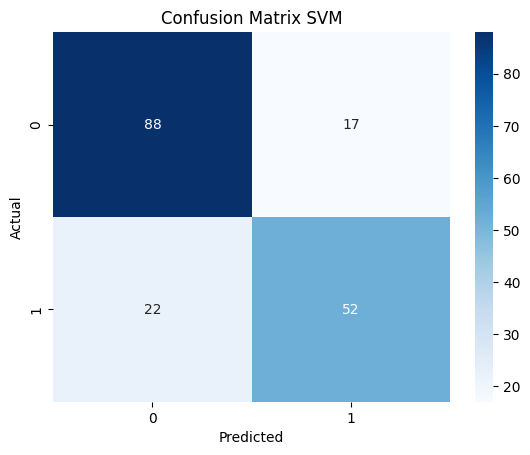

In [73]:
sns.heatmap(conf_matrix_svm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix SVM')
plt.show()

In [46]:
accuracy = accuracy_score(y_test, y_pred_svm)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.78


## Classification Report Model SVM

In [47]:
y_pred_svm = model_svm.predict(X_test)

report_svm = classification_report(y_test, y_pred_svm)

print(report_svm)

              precision    recall  f1-score   support

           0       0.80      0.84      0.82       105
           1       0.75      0.70      0.73        74

    accuracy                           0.78       179
   macro avg       0.78      0.77      0.77       179
weighted avg       0.78      0.78      0.78       179



In [48]:
feature_importance_svm = np.abs(model_svm.coef_[0])
feature_names_svm = X_train.columns

importance_df_svm = pd.DataFrame({'Feature': feature_names_svm, 'Importance': feature_importance_svm})

importance_df_svm = importance_df_svm.sort_values(by='Importance', ascending=False)

print(importance_df_svm)

    Feature  Importance
1       Sex    2.001968
3     SibSp    0.005087
4     Parch    0.001936
0    Pclass    0.001663
6  Embarked    0.000635
2       Age    0.000111
5      Fare    0.000082


# Perbandingan 3 Model

In [49]:
# Model Random Forest
y_pred_rf = model_rf.predict(X_test)
report_rf = classification_report(y_test, y_pred_rf, output_dict=True)

# Model Logistic Regression
y_pred_lr = model_lr.predict(X_test)
report_lr = classification_report(y_test, y_pred_lr, output_dict=True)

# Model SVM
y_pred_svm = model_svm.predict(X_test)
report_svm = classification_report(y_test, y_pred_svm, output_dict=True)

In [51]:
# Mengambil nilai akurasi
accuracy_rf = report_rf['accuracy']
accuracy_lr = report_lr['accuracy']
accuracy_svm = report_svm['accuracy']

# Mengambil precision, recall, dan f1-score untuk target 0 dan 1
metrics_rf = {
    'precision_0': report_rf['0']['precision'],
    'recall_0': report_rf['0']['recall'],
    'f1_0': report_rf['0']['f1-score'],
    'precision_1': report_rf['1']['precision'],
    'recall_1': report_rf['1']['recall'],
    'f1_1': report_rf['1']['f1-score'],
}

metrics_lr = {
    'precision_0': report_lr['0']['precision'],
    'recall_0': report_lr['0']['recall'],
    'f1_0': report_lr['0']['f1-score'],
    'precision_1': report_lr['1']['precision'],
    'recall_1': report_lr['1']['recall'],
    'f1_1': report_lr['1']['f1-score'],
}

metrics_svm = {
    'precision_0': report_svm['0']['precision'],
    'recall_0': report_svm['0']['recall'],
    'f1_0': report_svm['0']['f1-score'],
    'precision_1': report_svm['1']['precision'],
    'recall_1': report_svm['1']['recall'],
    'f1_1': report_svm['1']['f1-score'],
}

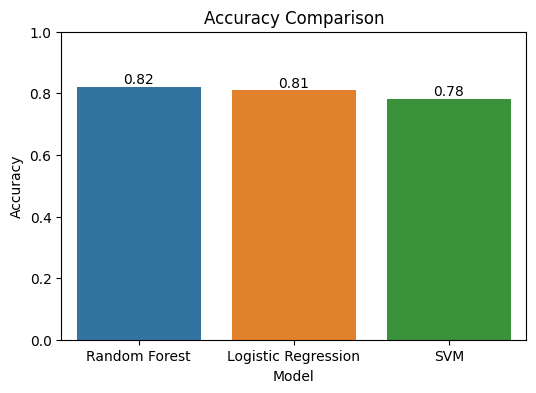

In [74]:
# Dataframe untuk akurasi
accuracy_data = {
    'Model': ['Random Forest', 'Logistic Regression', 'SVM'],
    'Accuracy': [accuracy_rf, accuracy_lr, accuracy_svm]
}

df_accuracy = pd.DataFrame(accuracy_data)

# Plot grafik akurasi
plt.figure(figsize=(6, 4))
ax = sns.barplot(x='Model', y='Accuracy', data=df_accuracy)
plt.title('Accuracy Comparison')
plt.ylim(0, 1)

# Menambahkan anotasi angka di tengah batang grafik
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height:.2f}', 
                xy=(p.get_x() + p.get_width() / 2, height), 
                xytext=(0, 5),  # Jarak teks dari batang
                textcoords='offset points',
                ha='center', va='center')

plt.show()

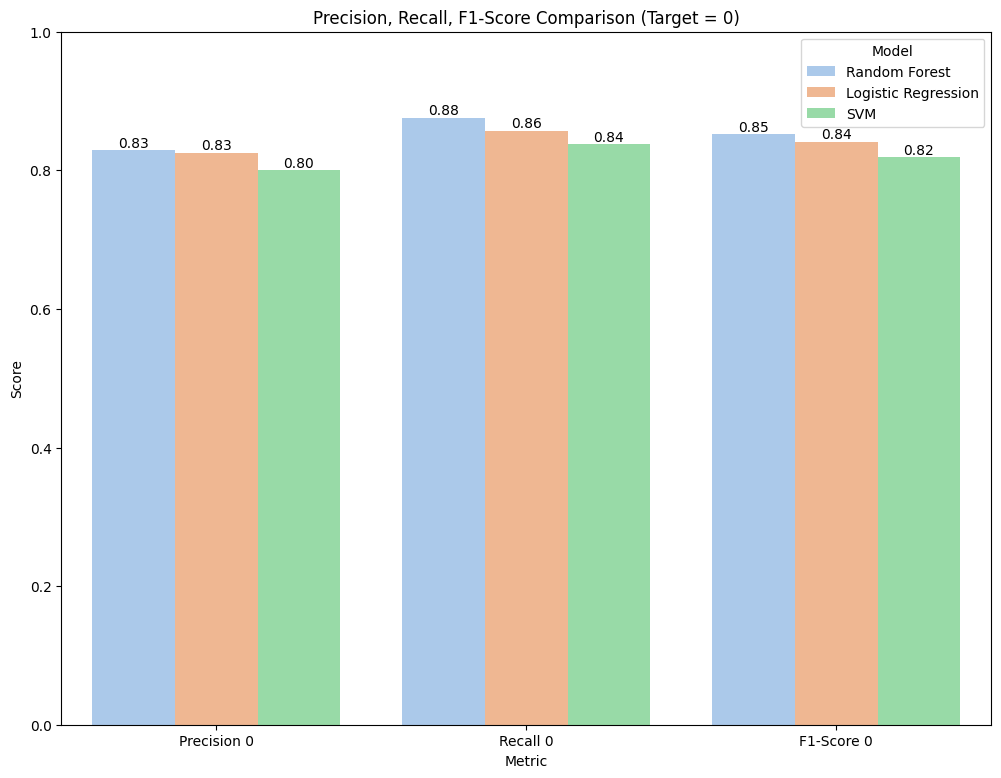

In [83]:
# Gabungkan data untuk precision, recall, dan f1-score
metrics_df = pd.DataFrame({
    'Metric': ['Precision 0', 'Recall 0', 'F1-Score 0', 'Precision 1', 'Recall 1', 'F1-Score 1'] * 3,
    'Model': ['Random Forest'] * 6 + ['Logistic Regression'] * 6 + ['SVM'] * 6,
    'Score': [
        metrics_rf['precision_0'], metrics_rf['recall_0'], metrics_rf['f1_0'], metrics_rf['precision_1'], metrics_rf['recall_1'], metrics_rf['f1_1'],
        metrics_lr['precision_0'], metrics_lr['recall_0'], metrics_lr['f1_0'], metrics_lr['precision_1'], metrics_lr['recall_1'], metrics_lr['f1_1'],
        metrics_svm['precision_0'], metrics_svm['recall_0'], metrics_svm['f1_0'], metrics_svm['precision_1'], metrics_svm['recall_1'], metrics_svm['f1_1']
    ]
})

# Warna pastel untuk grafik
pastel_colors = sns.color_palette("pastel")

# Plot grafik untuk target 0
plt.figure(figsize=(12, 9))
ax0 = sns.barplot(x='Metric', y='Score', hue='Model', data=metrics_df[metrics_df['Metric'].str.contains('0')], palette=pastel_colors)
plt.title('Precision, Recall, F1-Score Comparison (Target = 0)')
plt.ylim(0, 1)

# Menambahkan anotasi angka di tengah bar chart untuk target 0
for p in ax0.patches:
    height = p.get_height()
    ax0.annotate(f'{height:.2f}', 
                 xy=(p.get_x() + p.get_width() / 2, height), 
                 xytext=(0, 5),  # Jarak teks dari batang
                 textcoords='offset points',
                 ha='center', va='center')

plt.show()

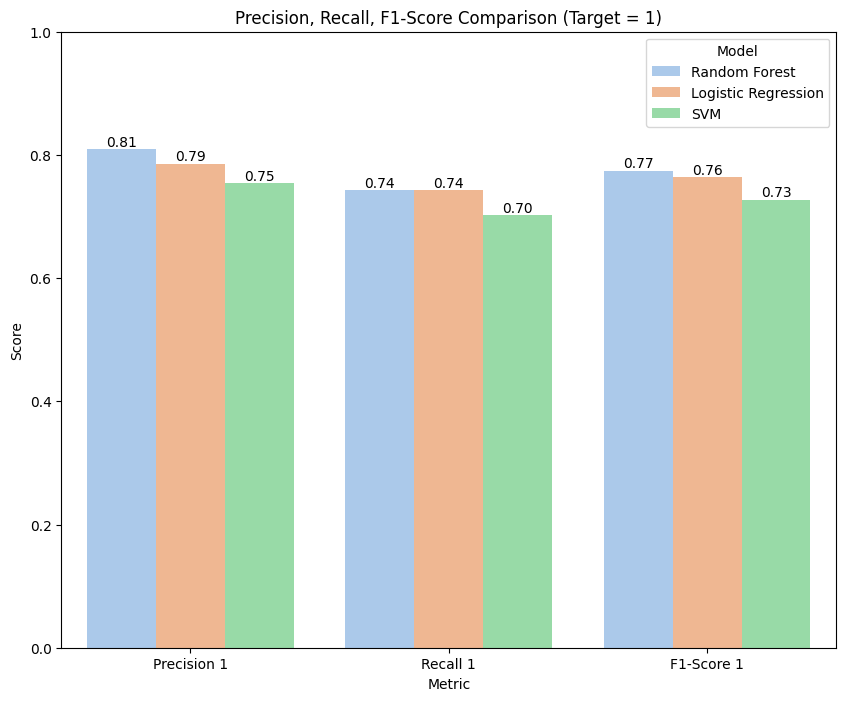

In [59]:
# Warna pastel untuk grafik
pastel_colors = sns.color_palette("pastel")

# Filter data untuk target 1 (tanpa F1-Score 0)
metrics_target1 = metrics_df[metrics_df['Metric'].str.contains('1') & ~metrics_df['Metric'].str.contains('F1-Score 0')]

# Plot grafik untuk target 1
plt.figure(figsize=(, 8))
ax1 = sns.barplot(x='Metric', y='Score', hue='Model', data=metrics_target1, palette=pastel_colors)
plt.title('Precision, Recall, F1-Score Comparison (Target = 1)')
plt.ylim(0, 1)

# Menambahkan anotasi angka di tengah bar chart untuk target 1
for p in ax1.patches:
    height = p.get_height()
    ax1.annotate(f'{height:.2f}', 
                 xy=(p.get_x() + p.get_width() / 2, height), 
                 xytext=(0, 5),  # Jarak teks dari batang
                 textcoords='offset points',
                 ha='center', va='center')

plt.show()

In [86]:
# Random Forest
feature_importance_rf = model_rf.feature_importances_
feature_names_rf = X_train.columns

df_feature_importance_rf = pd.DataFrame({
    'Feature': feature_names_rf,
    'Importance': feature_importance_rf,
    'Model': 'Random Forest'
})

# Logistic Regression
feature_importance_lr = np.abs(model_lr.coef_[0])
feature_names_lr = X_train.columns

importance_df_lr = pd.DataFrame({
    'Feature': feature_names_lr,
    'Importance': feature_importance_lr,
    'Model': 'Logistic Regression'
})

# SVM
feature_importance_svm = np.abs(model_svm.coef_[0])
feature_names_svm = X_train.columns

importance_df_svm = pd.DataFrame({
    'Feature': feature_names_svm,
    'Importance': feature_importance_svm,
    'Model': 'SVM'
})

# Gabungkan ketiga DataFrame
df_all_importance = pd.concat([df_feature_importance_rf, importance_df_lr, importance_df_svm])

# Pivot table untuk format tabel yang lebih rapi
pivot_table = df_all_importance.pivot_table(index='Feature', columns='Model', values='Importance')

# Menyortir tabel berdasarkan importance model Random Forest sebagai referensi
pivot_table = pivot_table.sort_values(by='Random Forest', ascending=False)

pivot_table

Model,Logistic Regression,Random Forest,SVM
Feature,,,
Sex,2.596709,0.271410,2.001968
Fare,0.002533,0.265010,0.000082
Age,0.030430,0.249995,0.000111
Pclass,0.930727,0.086957,0.001663
SibSp,0.293865,0.053685,0.005087
Parch,0.111821,0.039897,0.001936
Embarked,0.218848,0.033044,0.000635
